# Loan Data

In [2]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pickle.load(open('/content/drive/MyDrive/ＭＹ FYP/Lending_Club_House_Cleaned.pkl', 'rb'))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7254 entries, 40 to 2260525
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          7254 non-null   object 
 1   loan_amnt                   7254 non-null   float64
 2   funded_amnt                 7254 non-null   float64
 3   funded_amnt_inv             7254 non-null   float64
 4   term                        7254 non-null   object 
 5   int_rate                    7254 non-null   float64
 6   installment                 7254 non-null   float64
 7   grade                       7254 non-null   object 
 8   sub_grade                   7254 non-null   object 
 9   emp_title                   7254 non-null   object 
 10  emp_length                  7254 non-null   object 
 11  home_ownership              7254 non-null   object 
 12  annual_inc                  7254 non-null   float64
 13  verification_status         7

# Remove Irrelavant Feature

In [6]:
df['purpose']

40         house
54         house
174        house
481        house
507        house
           ...  
2259056    house
2259339    house
2259838    house
2260401    house
2260525    house
Name: purpose, Length: 7254, dtype: object

In [7]:
df['purpose'].unique()

array(['house'], dtype=object)

*Purpose only contain one unique value*

In [8]:
df['title']

40         Home buying
54         Home buying
174        Home buying
481        Home buying
507        Home buying
              ...     
2259056    Home buying
2259339    Home buying
2259838    Home buying
2260401    Home buying
2260525    Home buying
Name: title, Length: 7254, dtype: object

*Title is just a subset of purpose*

In [9]:
df['id']

40         68476676
54         68543413
174        68466869
481        68466575
507        68426234
             ...   
2259056    90986382
2259339    90651571
2259838    90186105
2260401    90067702
2260525    90239801
Name: id, Length: 7254, dtype: object

In [10]:
df['id'].nunique()

7254

*Data contain in ID all are unique value, and it is only use for represent each customer*

In [11]:
df['grade']

40         D
54         C
174        D
481        C
507        D
          ..
2259056    C
2259339    D
2259838    D
2260401    D
2260525    C
Name: grade, Length: 7254, dtype: object

In [12]:
df['sub_grade']

40         D1
54         C2
174        D3
481        C1
507        D5
           ..
2259056    C4
2259339    D1
2259838    D2
2260401    D3
2260525    C5
Name: sub_grade, Length: 7254, dtype: object

*Grade and sub_grade basically are the same but sub_grade is more details.*

In [13]:
df['emp_title']

40             Clinical Intake
54         Contract Specialist
174               2nd pressman
481              CEO/Therapist
507                case worker
                  ...         
2259056                Foreman
2259339                Unknown
2259838                Unknown
2260401           haba manager
2260525                     RN
Name: emp_title, Length: 7254, dtype: object

In [14]:
df['emp_title'].nunique()

4635

*emp_title contains too much unique value* 

In [15]:
df['url']

40         https://lendingclub.com/browse/loanDetail.acti...
54         https://lendingclub.com/browse/loanDetail.acti...
174        https://lendingclub.com/browse/loanDetail.acti...
481        https://lendingclub.com/browse/loanDetail.acti...
507        https://lendingclub.com/browse/loanDetail.acti...
                                 ...                        
2259056    https://lendingclub.com/browse/loanDetail.acti...
2259339    https://lendingclub.com/browse/loanDetail.acti...
2259838    https://lendingclub.com/browse/loanDetail.acti...
2260401    https://lendingclub.com/browse/loanDetail.acti...
2260525    https://lendingclub.com/browse/loanDetail.acti...
Name: url, Length: 7254, dtype: object

*url store user detail link for each user but need account to access it* 

In [16]:
df['zip_code']

40         331xx
54         644xx
174        080xx
481        276xx
507        113xx
           ...  
2259056    356xx
2259339    804xx
2259838    346xx
2260401    600xx
2260525    301xx
Name: zip_code, Length: 7254, dtype: object

In [17]:
df['zip_code'].value_counts()

331xx    109
945xx     96
112xx     96
330xx     95
606xx     94
        ... 
423xx      1
261xx      1
844xx      1
877xx      1
812xx      1
Name: zip_code, Length: 751, dtype: int64

*zip code only contain dummy data* 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7254 entries, 40 to 2260525
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          7254 non-null   object 
 1   loan_amnt                   7254 non-null   float64
 2   funded_amnt                 7254 non-null   float64
 3   funded_amnt_inv             7254 non-null   float64
 4   term                        7254 non-null   object 
 5   int_rate                    7254 non-null   float64
 6   installment                 7254 non-null   float64
 7   grade                       7254 non-null   object 
 8   sub_grade                   7254 non-null   object 
 9   emp_title                   7254 non-null   object 
 10  emp_length                  7254 non-null   object 
 11  home_ownership              7254 non-null   object 
 12  annual_inc                  7254 non-null   float64
 13  verification_status         7

In [19]:
df['hardship_flag'].value_counts()

N    7254
Name: hardship_flag, dtype: int64

*hardship_flag only contain one unique value*

In [20]:
df['disbursement_method'].value_counts()

Cash         7240
DirectPay      14
Name: disbursement_method, dtype: int64

*most of the data in disbursement_method is the same*

In [21]:
df['application_type']

40         Individual
54         Individual
174        Individual
481        Individual
507        Individual
              ...    
2259056    Individual
2259339    Individual
2259838    Individual
2260401    Individual
2260525    Individual
Name: application_type, Length: 7254, dtype: object

In [22]:
df['application_type'].value_counts()

Individual    7086
Joint App      168
Name: application_type, dtype: int64

*most of the data in application_type is the same*

In [23]:
df['pymnt_plan'].value_counts()

n    7254
Name: pymnt_plan, dtype: int64

*pymnt_plan only contain one unique value*

In [24]:
df['policy_code'].unique()

array([1.])

In [25]:
df.drop(['zip_code','url','id','emp_title','grade','purpose','title','pymnt_plan','application_type','fico_range_high','fico_range_low','disbursement_method','hardship_flag','policy_code'],axis=1,inplace=True)

# Analysis Numerical Data

In [26]:
df['loan_status'].value_counts()

0    5666
1    1588
Name: loan_status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


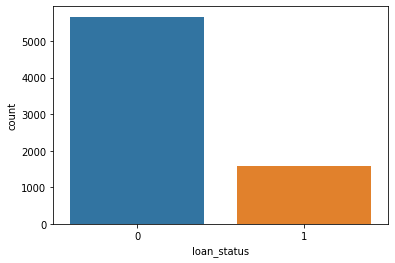

In [27]:
sns.countplot(df["loan_status"])

In [28]:
df['installment']

40          700.88
54          336.37
174         163.73
481         444.79
507         109.20
            ...   
2259056     309.75
2259339     136.36
2259838     936.22
2260401     947.43
2260525    1048.65
Name: installment, Length: 7254, dtype: float64

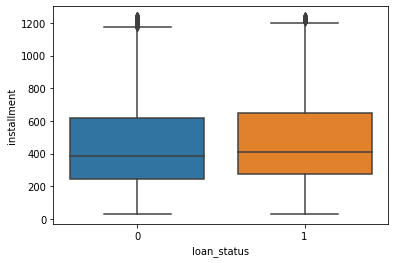

In [29]:
sns.boxplot(x='loan_status',y='installment',data=df)

In [30]:
df['installment']

40          700.88
54          336.37
174         163.73
481         444.79
507         109.20
            ...   
2259056     309.75
2259339     136.36
2259838     936.22
2260401     947.43
2260525    1048.65
Name: installment, Length: 7254, dtype: float64

In [31]:
df['Delingquencies'] = df['delinq_2yrs']

In [32]:
df.drop('delinq_2yrs',axis=1,inplace=True)

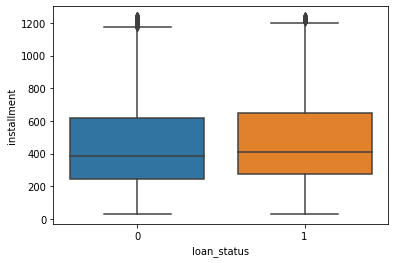

In [33]:
sns.boxplot(x='loan_status',y='installment',data=df)

In [34]:
df[["last_fico_range_low", "last_fico_range_high"]].corr()

,last_fico_range_low,last_fico_range_high
last_fico_range_low,1.000000,0.907436
last_fico_range_high,0.907436,1.000000


In [35]:
df["fico_score"] = df[["last_fico_range_low", "last_fico_range_high"]].mean(axis = 1)

In [36]:
df.drop(['last_fico_range_low','last_fico_range_high'],axis=1,inplace=True)

In [37]:
df['annual_inc']

40          70000.0
54          91392.0
174         56000.0
481        155000.0
507         54000.0
             ...   
2259056     70000.0
2259339     47000.0
2259838     60000.0
2260401     55000.0
2260525     65000.0
Name: annual_inc, Length: 7254, dtype: float64

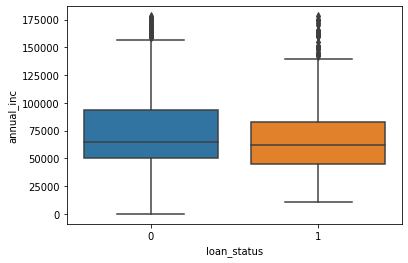

In [38]:
sns.boxplot(x='loan_status',y='annual_inc',data=df)

In [39]:
df['funded_amnt']

40         20000.0
54         10000.0
174         4575.0
481        20000.0
507         3000.0
            ...   
2259056     9000.0
2259339     3825.0
2259838    25900.0
2260401    25850.0
2260525    30000.0
Name: funded_amnt, Length: 7254, dtype: float64

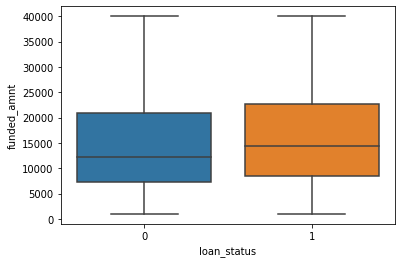

In [40]:
sns.boxplot(x='loan_status',y='funded_amnt',data=df)

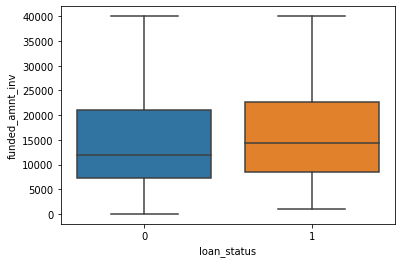

In [41]:
sns.boxplot(x='loan_status',y='funded_amnt_inv',data=df)

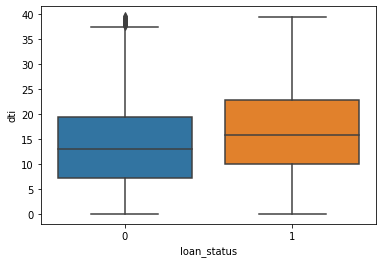

In [42]:
sns.boxplot(x='loan_status',y='dti',data=df)

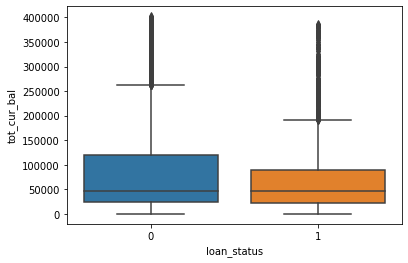

In [43]:
sns.boxplot(x='loan_status',y='tot_cur_bal',data=df)

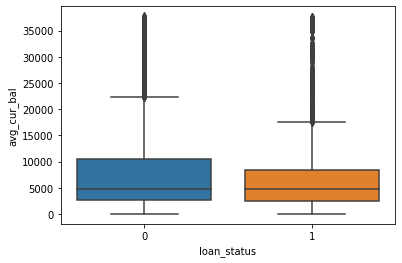

In [44]:
sns.boxplot(x='loan_status',y='avg_cur_bal',data=df)

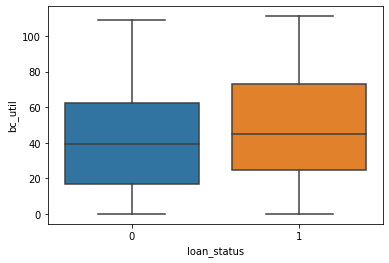

In [45]:
sns.boxplot(x='loan_status',y='bc_util',data=df)

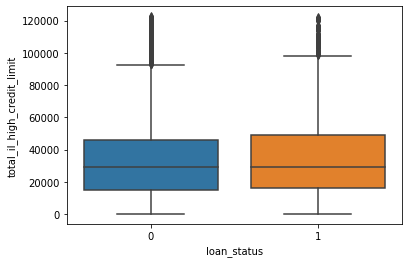

In [46]:
sns.boxplot(x='loan_status',y='total_il_high_credit_limit',data=df)

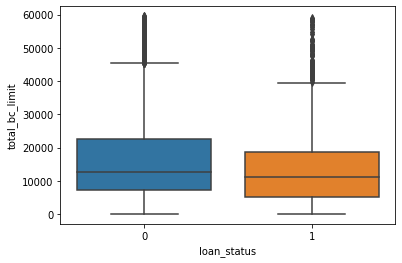

In [47]:
sns.boxplot(x='loan_status',y='total_bc_limit',data=df)

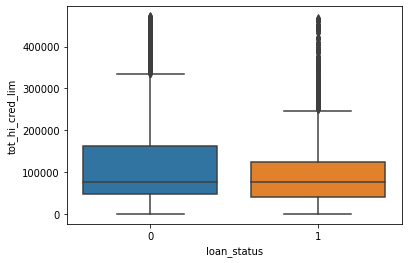

In [48]:
sns.boxplot(x='loan_status',y='tot_hi_cred_lim',data=df)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7254 entries, 40 to 2260525
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   7254 non-null   float64
 1   funded_amnt                 7254 non-null   float64
 2   funded_amnt_inv             7254 non-null   float64
 3   term                        7254 non-null   object 
 4   int_rate                    7254 non-null   float64
 5   installment                 7254 non-null   float64
 6   sub_grade                   7254 non-null   object 
 7   emp_length                  7254 non-null   object 
 8   home_ownership              7254 non-null   object 
 9   annual_inc                  7254 non-null   float64
 10  verification_status         7254 non-null   object 
 11  loan_status                 7254 non-null   int64  
 12  addr_state                  7254 non-null   object 
 13  dti                         7

In [50]:
df['tot_coll_amt']

40          264.0
54            0.0
174        7233.0
481           0.0
507           0.0
            ...  
2259056       0.0
2259339       0.0
2259838       0.0
2260401     180.0
2260525       0.0
Name: tot_coll_amt, Length: 7254, dtype: float64

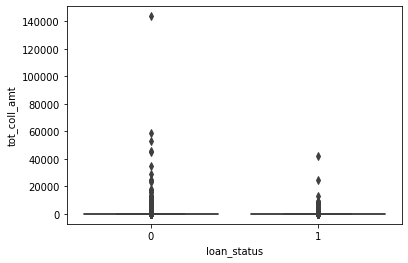

In [51]:
sns.boxplot(x='loan_status',y='tot_coll_amt',data=df)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7254 entries, 40 to 2260525
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   7254 non-null   float64
 1   funded_amnt                 7254 non-null   float64
 2   funded_amnt_inv             7254 non-null   float64
 3   term                        7254 non-null   object 
 4   int_rate                    7254 non-null   float64
 5   installment                 7254 non-null   float64
 6   sub_grade                   7254 non-null   object 
 7   emp_length                  7254 non-null   object 
 8   home_ownership              7254 non-null   object 
 9   annual_inc                  7254 non-null   float64
 10  verification_status         7254 non-null   object 
 11  loan_status                 7254 non-null   int64  
 12  addr_state                  7254 non-null   object 
 13  dti                         7

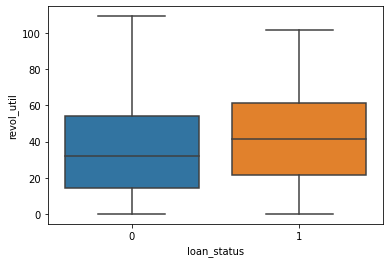

In [53]:
sns.boxplot(x='loan_status',y='revol_util',data=df)

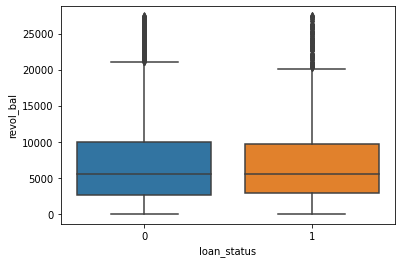

In [54]:
sns.boxplot(x='loan_status',y='revol_bal',data=df)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7254 entries, 40 to 2260525
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   7254 non-null   float64
 1   funded_amnt                 7254 non-null   float64
 2   funded_amnt_inv             7254 non-null   float64
 3   term                        7254 non-null   object 
 4   int_rate                    7254 non-null   float64
 5   installment                 7254 non-null   float64
 6   sub_grade                   7254 non-null   object 
 7   emp_length                  7254 non-null   object 
 8   home_ownership              7254 non-null   object 
 9   annual_inc                  7254 non-null   float64
 10  verification_status         7254 non-null   object 
 11  loan_status                 7254 non-null   int64  
 12  addr_state                  7254 non-null   object 
 13  dti                         7

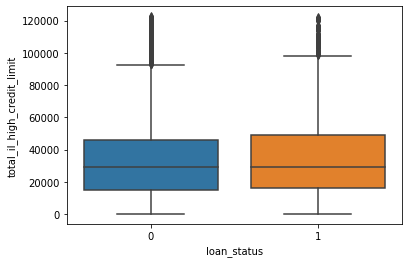

In [56]:
sns.boxplot(x='loan_status',y='total_il_high_credit_limit',data=df)

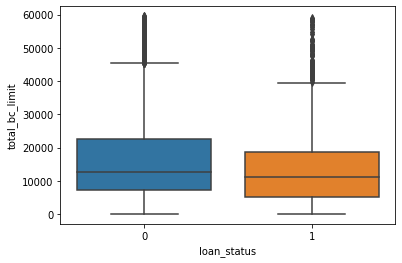

In [57]:
sns.boxplot(x='loan_status',y='total_bc_limit',data=df)

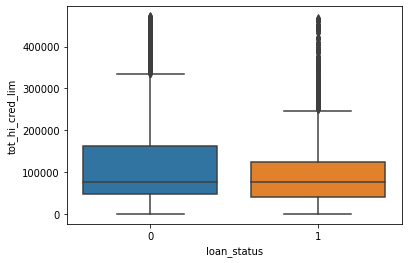

In [58]:
sns.boxplot(x='loan_status',y='tot_hi_cred_lim',data=df)

In [59]:
fig = px.scatter(df, x='loan_amnt',y='installment',color='loan_status',trendline='ols')
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [60]:
fig = px.scatter(df, x='loan_amnt',y='int_rate',color='loan_status',trendline="ols")
fig.show()

In [61]:
fig = px.scatter(df, x='loan_amnt',y='annual_inc',color='loan_status',trendline="ols")
fig.show()

In [62]:
fig = px.scatter(df, x='int_rate',y='fico_score',color='loan_status',trendline="ols")
fig.show()

In [63]:
fig = px.scatter(df, x='dti',y='int_rate',color='loan_status', trendline="ols")
fig.show()

# Analysis Categorical Data

In [64]:
def cal_percentage_default(df, col):
    temp_default = []
    temp_total = []
    for i in df[col].unique():
        num_default = len(df[(df[col]==i) & (df['loan_status']==1)])
        num_total = len(df[df[col]==i])
        temp_default.append(num_default)
        temp_total.append(num_total)
        num_default=0
        num_total = 0
    
    rate_default_grade = []
    for i in range(df[col].nunique()):
        num = (temp_default[i]/temp_total[i])*100
        rate_default_grade.append(num)
        num = 0
    
    column_name = df[col].unique()
    dic = {col:column_name,'Percentage of default':rate_default_grade}
    bar = pd.DataFrame(dic)
    bar
    return bar

In [65]:
df['earliest_cr_line'] 

40         Jul-2004
54         Sep-2006
174        May-2001
481        Nov-1994
507        Jun-1999
             ...   
2259056    Jan-2004
2259339    Mar-1978
2259838    Apr-1988
2260401    Feb-2005
2260525    Nov-1992
Name: earliest_cr_line, Length: 7254, dtype: object

In [66]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [67]:
df['earliest_cr_line'] = df['earliest_cr_line'].dt.year

In [68]:
df['earliest_cr_line']

40         2004
54         2006
174        2001
481        1994
507        1999
           ... 
2259056    2004
2259339    1978
2259838    1988
2260401    2005
2260525    1992
Name: earliest_cr_line, Length: 7254, dtype: int64

In [69]:
df['earliest_cr_line'].value_counts()

2004    520
2003    482
2002    479
2005    478
2001    461
2006    448
2000    416
1999    369
2007    362
1998    336
1997    269
1995    247
1996    246
2008    236
1994    206
2010    158
2009    149
2011    132
1993    130
1992    103
1990     98
1991     95
2012     88
1989     87
1988     77
1987     73
2013     69
1986     55
1983     48
1985     47
1984     36
2014     36
1982     30
1978     28
1981     22
1980     20
1977     20
1979     15
1973     11
1971     10
1974      9
1976      9
1975      9
1969      8
1972      6
2015      6
1970      3
1966      2
1968      2
1963      2
1961      2
1967      2
1964      1
1962      1
Name: earliest_cr_line, dtype: int64

In [70]:
bar = cal_percentage_default(df,'earliest_cr_line')

In [71]:
bar

,earliest_cr_line,Percentage of default
0,2004,22.307692
1,2006,21.651786
2,2001,21.691974
3,1994,17.961165
4,1999,24.661247
5,1998,22.023810
6,2010,28.481013
7,2000,23.798077
8,1997,19.330855
9,1987,13.698630


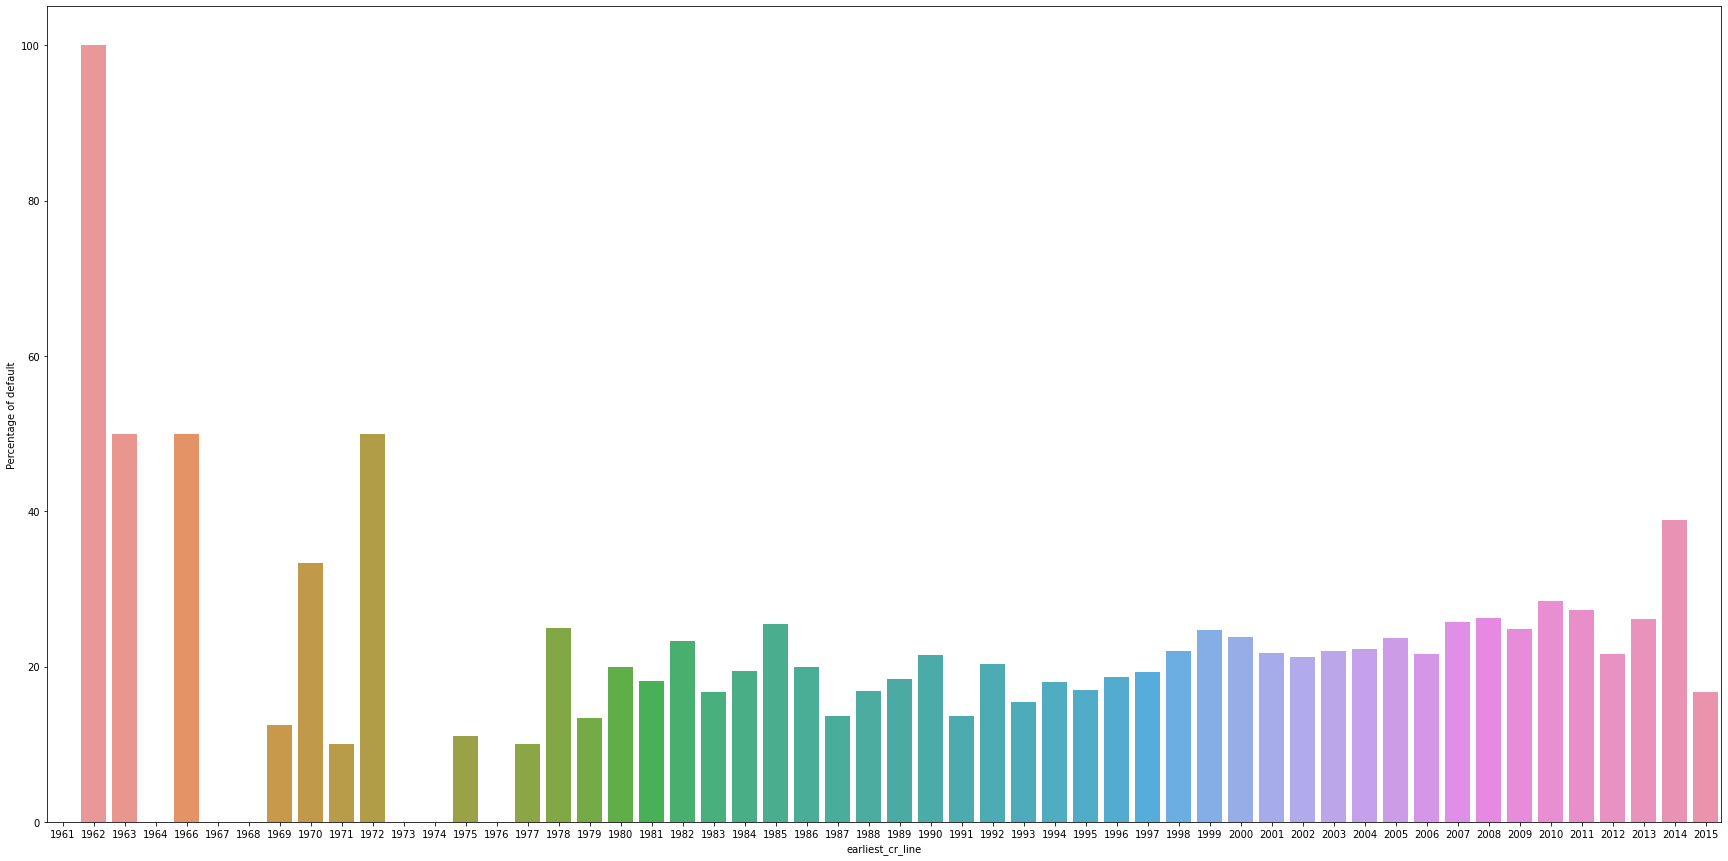

In [72]:
plt.figure(figsize=(30,15))
sns.barplot(x='earliest_cr_line', y='Percentage of default',data=bar.sort_values('earliest_cr_line'))

In [73]:
df['term']

40          36 months
54          36 months
174         36 months
481         60 months
507         36 months
              ...    
2259056     36 months
2259339     36 months
2259838     36 months
2260401     36 months
2260525     36 months
Name: term, Length: 7254, dtype: object

In [74]:
df['term'].value_counts()

 36 months    5333
 60 months    1921
Name: term, dtype: int64

In [75]:
bar = cal_percentage_default(df,'term')

In [76]:
bar

,term,Percentage of default
0,36 months,18.601163
1,60 months,31.025508


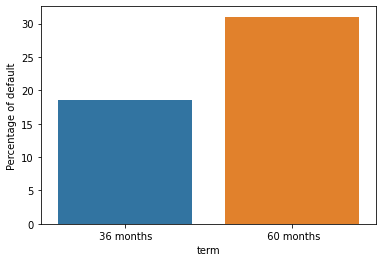

In [77]:

sns.barplot(x='term', y='Percentage of default',data=bar.sort_values('term'))

In [78]:
df['sub_grade']

40         D1
54         C2
174        D3
481        C1
507        D5
           ..
2259056    C4
2259339    D1
2259838    D2
2260401    D3
2260525    C5
Name: sub_grade, Length: 7254, dtype: object

In [79]:
df['sub_grade'].value_counts()

C5    389
C2    362
C1    361
C4    335
D1    323
C3    321
B3    309
B4    299
B5    288
D2    286
B1    271
D4    263
D3    257
B2    255
D5    249
E2    234
A5    232
A4    219
A3    207
E1    202
A1    189
E3    188
E5    173
E4    172
A2    145
F1    118
F2    112
F3     93
F4     87
F5     69
G1     67
G2     51
G4     48
G3     43
G5     37
Name: sub_grade, dtype: int64

In [80]:
bar = cal_percentage_default(df,'sub_grade')

In [81]:
bar

,sub_grade,Percentage of default
0,D1,23.219814
1,C2,18.784530
2,D3,34.241245
3,C1,20.498615
4,D5,29.718876
5,E3,30.319149
6,A4,7.305936
7,E1,31.683168
8,B2,13.725490
9,A3,7.729469


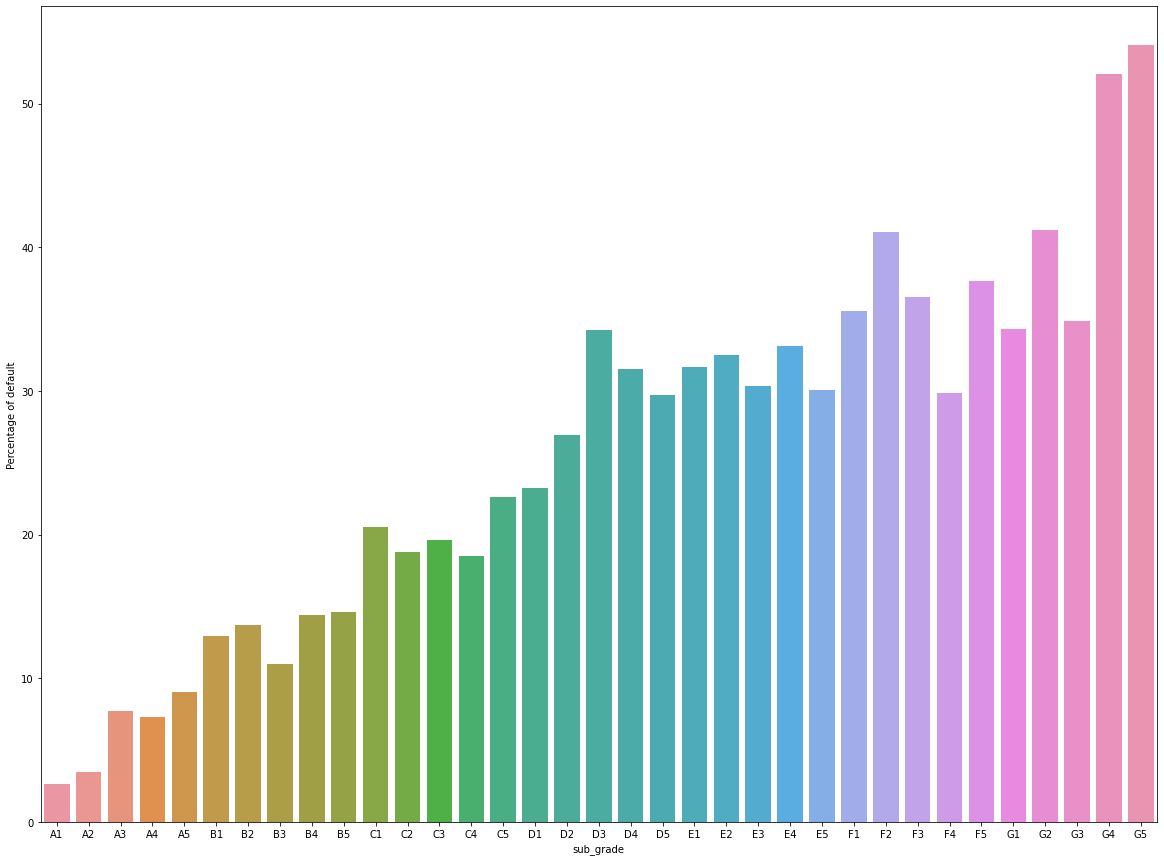

In [82]:
plt.figure(figsize=(20,15))
sns.barplot(x='sub_grade', y='Percentage of default',data=bar.sort_values('sub_grade'))

In [83]:
df['home_ownership'].value_counts()

RENT        3486
MORTGAGE    2557
OWN         1207
ANY            3
OTHER          1
Name: home_ownership, dtype: int64

In [84]:
df = df.loc[(df.home_ownership == 'RENT') | (df.home_ownership == 'MORTGAGE') | (df.home_ownership == 'OWN')]

In [85]:
bar = cal_percentage_default(df,'home_ownership')

In [86]:
bar

,home_ownership,Percentage of default
0,RENT,25.645439
1,MORTGAGE,17.911615
2,OWN,19.552610


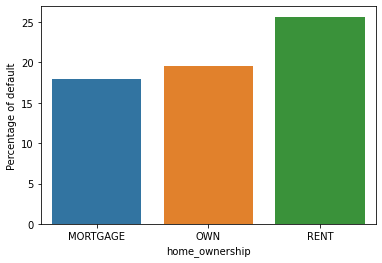

In [87]:
sns.barplot(x='home_ownership', y='Percentage of default',data=bar.sort_values('home_ownership'))

In [88]:
df['pub_rec'].value_counts()

0.0     5975
1.0     1034
2.0      160
3.0       49
4.0       19
5.0        6
6.0        4
8.0        2
10.0       1
Name: pub_rec, dtype: int64

In [89]:
df['initial_list_status']

40         w
54         f
174        w
481        w
507        w
          ..
2259056    w
2259339    f
2259838    w
2260401    f
2260525    f
Name: initial_list_status, Length: 7250, dtype: object

In [90]:
df['initial_list_status'].value_counts()

w    3958
f    3292
Name: initial_list_status, dtype: int64

In [91]:
bar = cal_percentage_default(df,'initial_list_status')

In [92]:
bar

,initial_list_status,Percentage of default
0,w,22.359778
1,f,21.354800


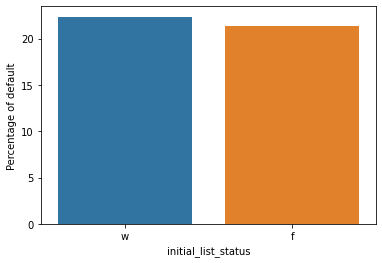

In [93]:
sns.barplot(x='initial_list_status', y='Percentage of default',data=bar)

In [94]:
df['emp_length'].value_counts()

10+ years    1970
2 years       763
< 1 year      668
3 years       653
1 year        534
5 years       532
4 years       471
Unknown       430
6 years       379
7 years       325
8 years       289
9 years       236
Name: emp_length, dtype: int64

In [95]:
bar = cal_percentage_default(df,'emp_length')

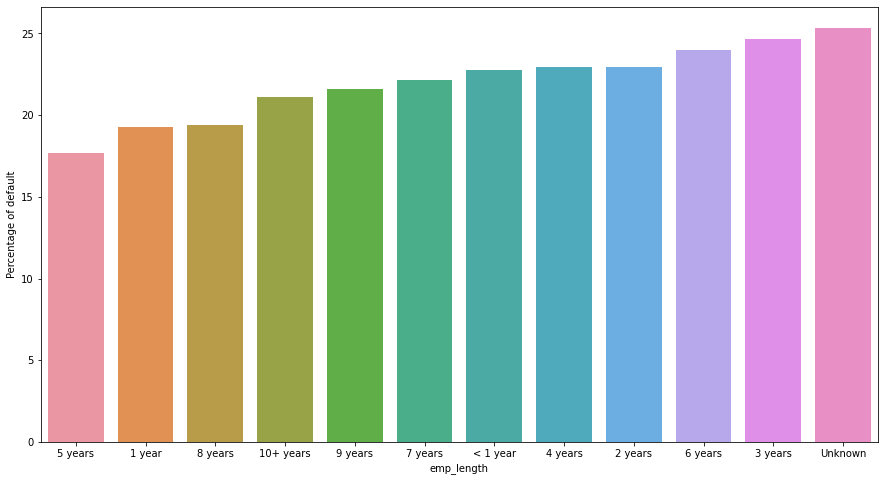

In [98]:
plt.figure(figsize=(15,8))
sns.barplot(x='emp_length', y='Percentage of default',data=bar.sort_values('Percentage of default'))

In [99]:
df['Delingquencies'] = df['Delingquencies'].astype(str)

In [100]:
def convert_deling(row):
    if row == '0.0':
        return "0.0"
    elif row == "1.0":
        return "1.0"
    else:
        return "1.0+"
        
df['Delingquencies'] = df.apply(lambda x: convert_deling(x['Delingquencies']),axis=1)

In [101]:
df['Delingquencies'].value_counts()

0.0     5708
1.0     1000
1.0+     542
Name: Delingquencies, dtype: int64

In [102]:
bar = cal_percentage_default(df,'Delingquencies')

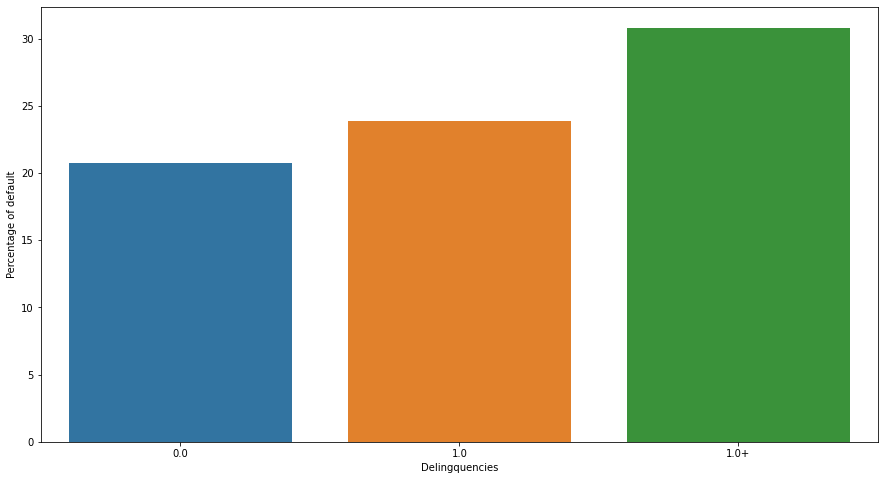

In [103]:
plt.figure(figsize=(15,8))
sns.barplot(x='Delingquencies', y='Percentage of default',data=bar)

In [104]:
df['verification_status']

40            Not Verified
54            Not Verified
174           Not Verified
481        Source Verified
507           Not Verified
                ...       
2259056    Source Verified
2259339           Verified
2259838       Not Verified
2260401       Not Verified
2260525    Source Verified
Name: verification_status, Length: 7250, dtype: object

In [105]:
df['verification_status'].value_counts()

Source Verified    3054
Verified           2617
Not Verified       1579
Name: verification_status, dtype: int64

In [106]:
bar = cal_percentage_default(df,'verification_status')

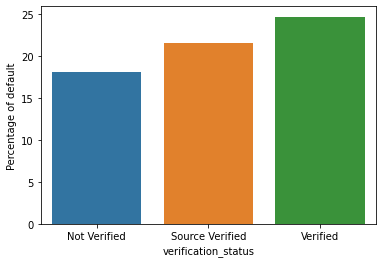

In [107]:
sns.barplot(x='verification_status', y='Percentage of default',data=bar)

In [108]:
df['pub_rec'].value_counts()

0.0     5975
1.0     1034
2.0      160
3.0       49
4.0       19
5.0        6
6.0        4
8.0        2
10.0       1
Name: pub_rec, dtype: int64

In [109]:
df['pub_rec'] = df['pub_rec'].astype(str)

In [110]:
def convert_rec(row):
    if row == '0.0':
        return "0.0"
    elif row == "1.0":
        return "1.0"
    else:
        return "1.0+"
        
df['pub_rec'] = df.apply(lambda x: convert_rec(x['pub_rec']),axis=1)

In [111]:
bar = cal_percentage_default(df,'pub_rec')

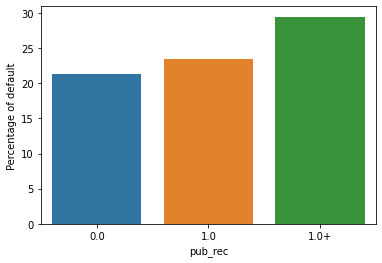

In [112]:
sns.barplot(x='pub_rec', y='Percentage of default',data=bar)

In [113]:
df['pub_rec_bankruptcies'].value_counts()

0.0    6339
1.0     845
2.0      52
3.0       7
4.0       4
5.0       3
Name: pub_rec_bankruptcies, dtype: int64

In [114]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].astype(str)

In [115]:
def convert_bank(row):
    if row == '0.0':
        return "0.0"
    elif row == "1.0":
        return "1.0"
    else:
        return "1.0+"

        
df['pub_rec_bankruptcies'] = df.apply(lambda x: convert_bank(x['pub_rec_bankruptcies']),axis=1)

In [116]:
bar = cal_percentage_default(df,'pub_rec_bankruptcies')

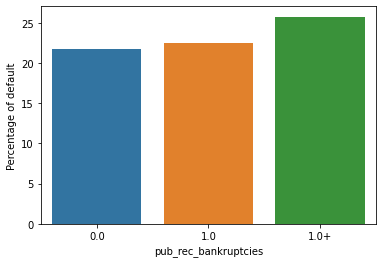

In [117]:
sns.barplot(x='pub_rec_bankruptcies', y='Percentage of default',data=bar)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7250 entries, 40 to 2260525
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   7250 non-null   float64
 1   funded_amnt                 7250 non-null   float64
 2   funded_amnt_inv             7250 non-null   float64
 3   term                        7250 non-null   object 
 4   int_rate                    7250 non-null   float64
 5   installment                 7250 non-null   float64
 6   sub_grade                   7250 non-null   object 
 7   emp_length                  7250 non-null   object 
 8   home_ownership              7250 non-null   object 
 9   annual_inc                  7250 non-null   float64
 10  verification_status         7250 non-null   object 
 11  loan_status                 7250 non-null   int64  
 12  addr_state                  7250 non-null   object 
 13  dti                         7

In [119]:
df['tax_liens'].value_counts()

0.0     6970
1.0      181
2.0       61
3.0       23
4.0        7
5.0        4
6.0        2
10.0       1
8.0        1
Name: tax_liens, dtype: int64

In [120]:
df['tax_liens'] = df['tax_liens'].astype(str)

In [121]:
def convert_tax(row):
    if row == '0.0':
        return "N"
    else:
        return "Y"
        
df['tax_liens'] = df.apply(lambda x: convert_tax(x['tax_liens']),axis=1)

In [122]:
bar = cal_percentage_default(df,'tax_liens')

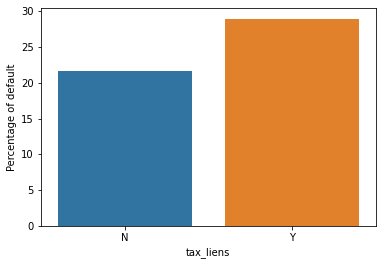

In [123]:
sns.barplot(x='tax_liens', y='Percentage of default',data=bar)

In [126]:
df['acc_deling'] = df['acc_now_delinq'] 

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7250 entries, 40 to 2260525
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   7250 non-null   float64
 1   funded_amnt                 7250 non-null   float64
 2   funded_amnt_inv             7250 non-null   float64
 3   term                        7250 non-null   object 
 4   int_rate                    7250 non-null   float64
 5   installment                 7250 non-null   float64
 6   sub_grade                   7250 non-null   object 
 7   emp_length                  7250 non-null   object 
 8   home_ownership              7250 non-null   object 
 9   annual_inc                  7250 non-null   float64
 10  verification_status         7250 non-null   object 
 11  loan_status                 7250 non-null   int64  
 12  addr_state                  7250 non-null   object 
 13  dti                         7

# Pickle

In [125]:
pickle.dump(df, open('/content/drive/MyDrive/ＭＹ FYP/Lending_Club_House_EDA.pkl', 'wb'))